In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [3]:
# Load the data

df = pd.read_csv('housing.csv')
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,7049053337,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
384973,7049052968,https://reno.craigslist.org/apa/d/sparks-over-...,reno / tahoe,https://reno.craigslist.org,1549,apartment,1034,2,2.0,1,...,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00808_3EobCZHFEx...,AN OASIS OF YOUR OWN Introducing Lumina at Spa...,39.6269,-119.708,ca
384974,7049050454,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1249,apartment,840,2,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_kr3uKMhzrf...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5358,-119.746,ca
384975,7049050149,https://reno.craigslist.org/apa/d/sparks-ready...,reno / tahoe,https://reno.craigslist.org,1429,apartment,976,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00c0c_1GslcQnpLP...,Welcome Home We welcome you to The Villas at D...,39.5585,-119.703,ca


In [4]:
print(df.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')


In [5]:
# Drop the null rows
df = df.dropna()

df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
6,7049020738,https://reno.craigslist.org/apa/d/1-bedroom-av...,reno / tahoe,https://reno.craigslist.org,935,apartment,661,1,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00C0C_i1DJWxfSZC...,Tucked away in a park-like setting on the edge...,39.5118,-119.802,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384970,7049202533,https://sacramento.craigslist.org/apa/d/sacram...,sacramento,https://sacramento.craigslist.org,1960,apartment,1198,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00U0U_aWGzaz7zF9...,Breathe Easy â Youâve Found Your New Home....,38.4962,-121.530,ca
384972,7049053337,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
384974,7049050454,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1249,apartment,840,2,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_kr3uKMhzrf...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5358,-119.746,ca
384975,7049050149,https://reno.craigslist.org/apa/d/sparks-ready...,reno / tahoe,https://reno.craigslist.org,1429,apartment,976,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00c0c_1GslcQnpLP...,Welcome Home We welcome you to The Villas at D...,39.5585,-119.703,ca


In [6]:
df=df.drop(columns=['id','url','region_url','image_url','description','lat','long'])
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca
6,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca


In [7]:
region_counts=df.region.value_counts()
region_counts

rochester                 2888
jacksonville              2549
columbus                  2178
omaha / council bluffs    2025
minneapolis / st paul     2016
                          ... 
owensboro                    6
southwest MS                 5
southwest TX                 5
kansas city                  3
fort smith, AR               1
Name: region, Length: 404, dtype: int64

<AxesSubplot:ylabel='Density'>

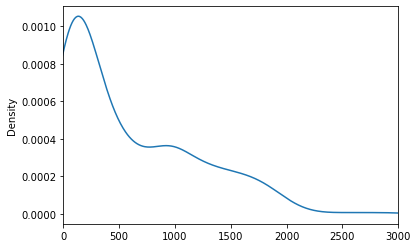

In [8]:
region_counts.plot.density(xlim=[0,3000])

The density plot falls off around 500. Based on the plot we can see that there is still a sizable amount of data with the frequency greater than 500. So we will filter out regions that have a frequency less than 500 occurances to ensure all regions we work with have a good amount of data.

In [9]:
regions_with_enough_data=list(region_counts[region_counts>=500].index)

Next step is filtering the dataframe with regions greater than 500

In [10]:
region_enough_data_df=df[df.region.isin(regions_with_enough_data) ]
region_enough_data_df

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca
6,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384970,sacramento,1960,apartment,1198,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca
384972,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca
384974,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca
384975,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca


In [11]:
df=region_enough_data_df

In [12]:
df['price'].describe()

count    1.994560e+05
mean     1.565628e+04
std      6.198982e+06
min      0.000000e+00
25%      8.400000e+02
50%      1.095000e+03
75%      1.495000e+03
max      2.768307e+09
Name: price, dtype: float64

In [13]:
range=list(df.price.quantile([0.01,0.99]))
range

[395.0, 3600.0]

In the previous step we have found that values between 1 percentile and 99 percentile. Rest of the values are considered outliers and will be ignored.

In [14]:
df=df[(df.price >= range[0]) & (df.price <= range[1])]
df

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca
6,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384970,sacramento,1960,apartment,1198,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca
384972,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca
384974,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca
384975,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca


In [15]:
df.type.value_counts()

apartment          159228
house               15563
townhouse           10003
condo                3783
duplex               3176
manufactured         2568
loft                  444
flat                  375
cottage/cabin         326
in-law                101
land                    2
assisted living         1
Name: type, dtype: int64

Loft, flat, cottage/cabin, in-law, land and assisted living have a very small amount
of data (<1% of the dataset) so we will ignore it.

In [16]:
df

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca
6,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384970,sacramento,1960,apartment,1198,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca
384972,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca
384974,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca
384975,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca


In [17]:
df.dtypes

region                      object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
state                       object
dtype: object

In [18]:
df=pd.get_dummies(data=df, columns=['region','type','laundry_options','parking_options','state'])
df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_wa,state_wi,state_wv
0,1148,1078,3,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200,1001,2,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1813,1683,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1095,708,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,935,661,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384970,1960,1198,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384972,1295,957,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384974,1249,840,2,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384975,1429,976,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Create our features
from sklearn.model_selection import train_test_split
y = df['price']
#X_with_dummies = pd.get_dummies(df)
#X_with_dummies

X=df.drop(columns="price")
#X=pd.get_dummies(X)

# Create our target


In [20]:
X

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,region_SF bay area,...,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_wa,state_wi,state_wv
0,1078,3,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,2,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1683,2,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,708,1,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,661,1,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384970,1198,2,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384972,957,2,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384974,840,2,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384975,976,2,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X.columns.to_list()

['sqfeet',
 'beds',
 'baths',
 'cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',
 'region_SF bay area',
 'region_akron / canton',
 'region_albany',
 'region_albuquerque',
 'region_amarillo',
 'region_anchorage / mat-su',
 'region_ann arbor',
 'region_annapolis',
 'region_asheville',
 'region_athens',
 'region_atlanta',
 'region_augusta',
 'region_austin',
 'region_bakersfield',
 'region_baltimore',
 'region_baton rouge',
 'region_battle creek',
 'region_birmingham',
 'region_bismarck',
 'region_bloomington',
 'region_boise',
 'region_boston',
 'region_boulder',
 'region_buffalo',
 'region_cedar rapids',
 'region_central NJ',
 'region_champaign urbana',
 'region_charleston',
 'region_charlotte',
 'region_charlottesville',
 'region_chattanooga',
 'region_chicago',
 'region_cincinnati',
 'region_cleveland',
 'region_college station',
 'region_colorado springs',
 'region_columbia',
 'region_columbus',
 'region_corpus 

In [22]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=1)
#Figure out how to fix stratify

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(48893,)


In [26]:
from sklearn import metrics

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


814.8629559206175
